# 机器学习作业一：KNN
- 姓名：史文天
- 学号：2110688
- 专业：信息安全

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：9月29日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：18329300691@163.com

### 导入需要的包

In [4]:
#导入所需的包
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

### 导入数据集 semesion

In [7]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float64(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [8]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

((1593, 256), (1593, 1))

### 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（模板中采用的是普通方法分割训练集和测试集，作业中需要用留一法）

留一法的一个优点是每次迭代中都使用了最大可能数目的样本来训练。另一个优点是该方法具有确定性

In [10]:
# KNN算法手动实现
from sklearn.model_selection import LeaveOneOut
def MyKnnClassifier(data_X, data_y, neighbors):
    acc = 0   # 计算准确率
    # 生成数据集和测试集
    loo = LeaveOneOut()
    book=0
    for train_row_index, test_row_index in loo.split(data_X):
        book+=1
        X_train = data_X[train_row_index, :]
        X_test = data_X[test_row_index]
        y_train =data_y[train_row_index, :]
        y_test = data_y[test_row_index]
        trainShape = X_train.shape[0]   # 获得训练集的大小
        testShape = X_test.shape[0]     # 获得测试集的大小
        testRes = []  # 存放测试结果
        # print(X_test)
        # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
        testDiffMat = np.tile(X_test,(trainShape , 1)) - X_train
        sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
        # 方差距离为方差矩阵的整行求和，是一个一位列向量
        sqTestDiffDis = sqTestDiffMat.sum(axis=1)
        testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
        sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
        labelCount = []
        for j in range(neighbors):  # 考察k近邻属于哪些类
            labelCount.append(y_train[sortIndex[j]][0])
        classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
        classifyRes = classifyRes.most_common(2)[0][0]
        testRes.append(classifyRes)
        if classifyRes == y_test[0][0]:  # 分类正确则将accRate+1
            acc += 1
    accRate = acc / data_y.shape[0]
    print('k={0}时，留一法测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(neighbors,X_test.shape[0],acc,accRate))
    return accRate

实验结果：

In [11]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时，留一法测试个数为1  正确个数为：1459  准确率为：0.9158819836785939
k=3时，留一法测试个数为1  正确个数为：1464  准确率为：0.9190207156308852
k=5时，留一法测试个数为1  正确个数为：1458  准确率为：0.9152542372881356


0.9152542372881356

## 中级要求
与weka机器学习包中的kNN分类结果进行对比

利用WEKA+留一法运行出来K=1时准确率为0.91651，K=3时准确率为0.902072，K=5时准确率为0.907094，下面通过可视化与编程实现的KNN留一法进行对比

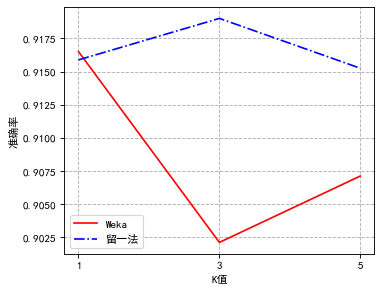

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 准备数据x y
x=range(1,6,2)
y_weka=[0.91651,0.902072,0.907094]
y_one=[0.91588,0.91902,0.91525]

# 2.创建画布
plt.figure(figsize=(5,4),dpi=80)

# 3.绘制图像
plt.plot(x,y_weka,color='r',linestyle='-',label="Weka")
plt.plot(x,y_one,color='b',linestyle='-.',label="留一法")
plt.legend()
plt.grid(linestyle="--")
x = [1,3,5]
plt.xticks(x)
plt.xlabel("K值")
plt.ylabel("准确率")
# 4.显示图
plt.show()

### 高级要求
上述已经将不同K值、多评价指标、多方法对比图展示出，下面仅对留一法、WEKA和调用sklearn库三种方法K=1~29进行准确率可视化进行对比分析

In [18]:
# kNN算法sklearn库实现
def KnnClassifier(data_X, data_y, neighbors, flag=0):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train.ravel())
    print('k={0}时，scikit-learn训练手写体识别的准确率为：{1}'.format(neighbors,knn.score(X_test, y_test)))
    # 交叉验证
    if flag == 1:
        scores = cross_val_score(knn,data_X,data_y.ravel(),cv=10,scoring='accuracy')
        return scores.mean()

In [16]:
scores1 = []
scores2 = []

# 留一法
for k in range(1,30):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)

# sklearn库实现KNN
for k in range(1,30):
    score2 = KnnClassifier(X, y, k, 1)
    scores2.append(score2)
    
# Weka实现KNN
# 根据Weka运行结果可得得：
scores3 = [0.916510, 0.885122, 0.902072, 0.907721, 0.907094, 0.907094, 0.912116, 0.908977, 0.908977, 0.905838,
           0.905838, 0.905210, 0.904583, 0.901444, 0.896422, 0.896422, 0.894539, 0.893911, 0.893911, 0.895794,
           0.895166, 0.897677, 0.893911, 0.893283, 0.891400, 0.887633, 0.885750, 0.885750, 0.888889]

k=1时，留一法测试个数为1  正确个数为：1459  准确率为：0.9158819836785939
k=2时，留一法测试个数为1  正确个数为：1459  准确率为：0.9158819836785939
k=3时，留一法测试个数为1  正确个数为：1464  准确率为：0.9190207156308852
k=4时，留一法测试个数为1  正确个数为：1465  准确率为：0.9196484620213434
k=5时，留一法测试个数为1  正确个数为：1458  准确率为：0.9152542372881356
k=6时，留一法测试个数为1  正确个数为：1464  准确率为：0.9190207156308852
k=7时，留一法测试个数为1  正确个数为：1469  准确率为：0.9221594475831764
k=8时，留一法测试个数为1  正确个数为：1472  准确率为：0.9240426867545511
k=9时，留一法测试个数为1  正确个数为：1471  准确率为：0.9234149403640929
k=10时，留一法测试个数为1  正确个数为：1465  准确率为：0.9196484620213434
k=11时，留一法测试个数为1  正确个数为：1456  准确率为：0.9139987445072191
k=12时，留一法测试个数为1  正确个数为：1460  准确率为：0.9165097300690521
k=13时，留一法测试个数为1  正确个数为：1461  准确率为：0.9171374764595104
k=14时，留一法测试个数为1  正确个数为：1453  准确率为：0.9121155053358443
k=15时，留一法测试个数为1  正确个数为：1446  准确率为：0.9077212806026366
k=16时，留一法测试个数为1  正确个数为：1446  准确率为：0.9077212806026366
k=17时，留一法测试个数为1  正确个数为：1442  准确率为：0.9052102950408035
k=18时，留一法测试个数为1  正确个数为：1438  准确率为：0.9026993094789705
k=19时，留一法测试个数为1  正确个数为：1436  准确率为：0.901443816698054
k=2

下图中展示出了不同K值对于留一法、sklearn库和Weka实现KNN的准确率曲线，可以观察到三种方法对于不同K值准确率变化趋势相同，且留一法相较于另外两种准确率较高

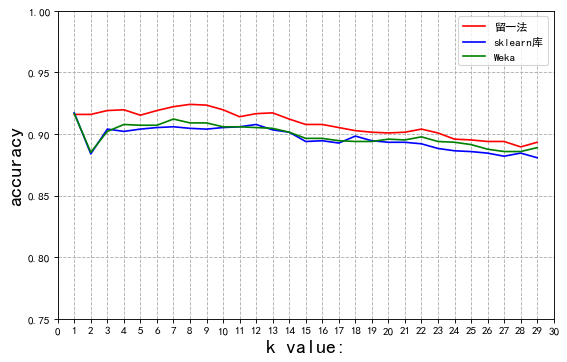

In [17]:
plt.figure(figsize=(8,5),dpi=80)

x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 30)
plt.ylim(0.75, 1)
# 普通kNN分类精度
plt.plot(range(1,30),scores1,'r',label="留一法")
plt.plot(range(1,30),scores2,'b',label="sklearn库")
plt.plot(range(1,30),scores3,'g',label="Weka")

plt.legend()
plt.grid(linestyle="--")
plt.xlabel('k value:',fontsize=18)
plt.ylabel('accuracy',fontsize=18)
plt.show()